In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
health_file_path = "Resources/HNPQEXCEL.csv"


In [3]:
# Read the health and nutrition study results
health_metadata = pd.read_csv(health_file_path)
pd.set_option('display.max_colwidth', None)
health_metadata.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,Total fertility rate (TFR) (births per woman): Q1 (lowest),SP.DYN.TFRT.Q1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.3,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Total fertility rate (TFR) (births per woman): Q2,SP.DYN.TFRT.Q2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.4,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Total fertility rate (TFR) (births per woman): Q3,SP.DYN.TFRT.Q3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.8,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,Total fertility rate (TFR) (births per woman): Q4,SP.DYN.TFRT.Q4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.3,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,Total fertility rate (TFR) (births per woman): Q5 (highest),SP.DYN.TFRT.Q5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.6,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Cleanup dataset for the desired columns and indictaors
specific_columns_health_metadata = health_metadata[["Country Name","Country Code","Indicator Name","2011","2015"]] 


In [5]:
cleaned_health_metadata = specific_columns_health_metadata.dropna()

In [6]:
list_of_countries = cleaned_health_metadata["Country Name"].unique()
list_of_indicator_name = cleaned_health_metadata["Indicator Name"].unique()
list_of_quintile = ["Q1","Q2","Q3","Q4","Q5"]

In [7]:
list_of_countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Armenia',
       'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Central African Republic', 'Chad', 'Colombia',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica',
       "Cote d'Ivoire", 'Dominican Republic', 'Egypt, Arab Rep.',
       'El Salvador', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia, The',
       'Georgia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iraq',
       'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kyrgyz Republic',
       'Lao PDR', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mexico', 'Moldova', 'Mongolia', 'Montenegro',
       'Mozambique', 'Namibia', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria',
       'North Macedonia', 'Pakistan', 'Panama', 'Paraguay', 'Peru',
       'Philippines', 'Rwanda', 

In [8]:
list_of_indicator_name

array(['Antenatal care (any skilled personnel) (% of women with a birth): Q1 (lowest)',
       'Antenatal care (any skilled personnel) (% of women with a birth): Q2',
       'Antenatal care (any skilled personnel) (% of women with a birth): Q3',
       'Antenatal care (any skilled personnel) (% of women with a birth): Q4',
       'Antenatal care (any skilled personnel) (% of women with a birth): Q5 (highest)',
       'Antenatal care (doctor) (% of women with a birth): Q1 (lowest)',
       'Antenatal care (doctor) (% of women with a birth): Q2',
       'Antenatal care (doctor) (% of women with a birth): Q3',
       'Antenatal care (doctor) (% of women with a birth): Q4',
       'Antenatal care (doctor) (% of women with a birth): Q5 (highest)',
       'Assistance during delivery (any skilled personnel) (% of births): Q1 (lowest)',
       'Assistance during delivery (any skilled personnel) (% of births): Q2',
       'Assistance during delivery (any skilled personnel) (% of births): Q3',
 

In [9]:
# Senegal country has all the necesity records for the given indicators
country_senegal_df = cleaned_health_metadata.loc[cleaned_health_metadata["Country Name"] == "Senegal"]


country_senegal_df.head()


,Country Name,Country Code,Indicator Name,2011,2015
70140,Senegal,SEN,Total fertility rate (TFR) (births per woman): Q1 (lowest),7.0,7.3
70141,Senegal,SEN,Total fertility rate (TFR) (births per woman): Q2,6.2,6.2
70142,Senegal,SEN,Total fertility rate (TFR) (births per woman): Q3,5.0,5.0
70143,Senegal,SEN,Total fertility rate (TFR) (births per woman): Q4,4.3,4.0
70144,Senegal,SEN,Total fertility rate (TFR) (births per woman): Q5 (highest),3.3,2.8


In [10]:
# Data to collect for each Indicator Name Quater and populate in the dataframe (open defecation)
open_defecation_Q1 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People practicing open defecation (% of population): Q1 (lowest)",:]
open_defecation_Q2 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People practicing open defecation (% of population): Q2",:]
open_defecation_Q3 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People practicing open defecation (% of population): Q3",:]
open_defecation_Q4 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People practicing open defecation (% of population): Q4",:]
open_defecation_Q5 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People practicing open defecation (% of population): Q5 (highest)",:]

open_defecation_df = [open_defecation_Q1,open_defecation_Q2,open_defecation_Q3,open_defecation_Q4,open_defecation_Q5]

final_open_defecation_df = pd.concat(open_defecation_df)
final_open_defecation_df['Quintile'] = list_of_quintile
final_open_defecation_df

,Country Name,Country Code,Indicator Name,2011,2015,Quintile
70345,Senegal,SEN,People practicing open defecation (% of population): Q1 (lowest),48.47630,45.20530,Q1
70346,Senegal,SEN,People practicing open defecation (% of population): Q2,28.60964,24.46607,Q2
70347,Senegal,SEN,People practicing open defecation (% of population): Q3,8.58056,4.33532,Q3
70348,Senegal,SEN,People practicing open defecation (% of population): Q4,1.07533,0.51887,Q4
70349,Senegal,SEN,People practicing open defecation (% of population): Q5 (highest),0.10383,0.02077,Q5


In [11]:
# Data to collect for each Indicator Name Quater and populate in the dataframe for rural (open defecation)
open_defecation_rural_Q1 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People practicing open defecation, rural (% of rural population): Q1 (lowest)",:]
open_defecation_rural_Q2 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People practicing open defecation, rural (% of rural population): Q2",:]
open_defecation_rural_Q3 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People practicing open defecation, rural (% of rural population): Q3",:]
open_defecation_rural_Q4 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People practicing open defecation, rural (% of rural population): Q4",:]
open_defecation_rural_Q5 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People practicing open defecation, rural (% of rural population): Q5 (highest)",:]

open_defecation_rural_df = [open_defecation_rural_Q1,open_defecation_rural_Q2,open_defecation_rural_Q3,open_defecation_rural_Q4,open_defecation_rural_Q5]

final_open_defecation_rural_df = pd.concat(open_defecation_rural_df)
final_open_defecation_rural_df['Quintile'] = list_of_quintile
final_open_defecation_rural_df

,Country Name,Country Code,Indicator Name,2011,2015,Quintile
70350,Senegal,SEN,"People practicing open defecation, rural (% of rural population): Q1 (lowest)",51.64509,49.26824,Q1
70351,Senegal,SEN,"People practicing open defecation, rural (% of rural population): Q2",43.57953,39.92251,Q2
70352,Senegal,SEN,"People practicing open defecation, rural (% of rural population): Q3",30.16549,26.56709,Q3
70353,Senegal,SEN,"People practicing open defecation, rural (% of rural population): Q4",15.37139,9.55869,Q4
70354,Senegal,SEN,"People practicing open defecation, rural (% of rural population): Q5 (highest)",2.65503,0.00000,Q5


In [12]:
# Data to collect for each Indicator Name Quater and populate in the dataframe for urban (open defecation)
open_defecation_urban_Q1 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People practicing open defecation, urban (% of urban population): Q1 (lowest)",:]
open_defecation_urban_Q2 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People practicing open defecation, urban (% of urban population): Q2",:]
open_defecation_urban_Q3 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People practicing open defecation, urban (% of urban population): Q3",:]
open_defecation_urban_Q4 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People practicing open defecation, urban (% of urban population): Q4",:]
open_defecation_urban_Q5 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People practicing open defecation, urban (% of urban population): Q5 (highest)",:]

open_defecation_urban_df = [open_defecation_urban_Q1,open_defecation_urban_Q2,open_defecation_urban_Q3,open_defecation_urban_Q4,open_defecation_urban_Q5]

final_open_defecation_urban_df = pd.concat(open_defecation_urban_df)
final_open_defecation_urban_df['Quintile'] = list_of_quintile
final_open_defecation_urban_df

,Country Name,Country Code,Indicator Name,2011,2015,Quintile
70355,Senegal,SEN,"People practicing open defecation, urban (% of urban population): Q1 (lowest)",8.73773,7.32870,Q1
70356,Senegal,SEN,"People practicing open defecation, urban (% of urban population): Q2",1.39177,1.18324,Q2
70357,Senegal,SEN,"People practicing open defecation, urban (% of urban population): Q3",0.68657,0.76899,Q3
70358,Senegal,SEN,"People practicing open defecation, urban (% of urban population): Q4",0.06334,0.03181,Q4
70359,Senegal,SEN,"People practicing open defecation, urban (% of urban population): Q5 (highest)",0.03285,0.04669,Q5


In [13]:
open_defecation_agg_df = final_open_defecation_df.groupby(["Country Name"])[["2011","2015"]].agg(['mean','median','var','std','sem'])
open_defecation_agg_df




2011                                                 2015  \
                   mean   median         var        std       sem       mean   
Country Name                                                                   
Senegal       17.369132  8.58056  433.705639  20.825601  9.313492  14.909266   

                                                        
               median         var        std       sem  
Country Name                                            
Senegal       4.33532  387.435331  19.683377  8.802674

In [14]:
merged_open_defecation_df = pd.merge(pd.merge(final_open_defecation_df,final_open_defecation_rural_df,on='Quintile'),final_open_defecation_urban_df,on='Quintile')
merged_open_defecation_df


,Country Name_x,Country Code_x,Indicator Name_x,2011_x,2015_x,Quintile,Country Name_y,Country Code_y,Indicator Name_y,2011_y,2015_y,Country Name,Country Code,Indicator Name,2011,2015
0,Senegal,SEN,People practicing open defecation (% of population): Q1 (lowest),48.47630,45.20530,Q1,Senegal,SEN,"People practicing open defecation, rural (% of rural population): Q1 (lowest)",51.64509,49.26824,Senegal,SEN,"People practicing open defecation, urban (% of urban population): Q1 (lowest)",8.73773,7.32870
1,Senegal,SEN,People practicing open defecation (% of population): Q2,28.60964,24.46607,Q2,Senegal,SEN,"People practicing open defecation, rural (% of rural population): Q2",43.57953,39.92251,Senegal,SEN,"People practicing open defecation, urban (% of urban population): Q2",1.39177,1.18324
2,Senegal,SEN,People practicing open defecation (% of population): Q3,8.58056,4.33532,Q3,Senegal,SEN,"People practicing open defecation, rural (% of rural population): Q3",30.16549,26.56709,Senegal,SEN,"People practicing open defecation, urban (% of urban population): Q3",0.68657,0.76899
3,Senegal,SEN,People practicing open defecation (% of population): Q4,1.07533,0.51887,Q4,Senegal,SEN,"People practicing open defecation, rural (% of rural population): Q4",15.37139,9.55869,Senegal,SEN,"People practicing open defecation, urban (% of urban population): Q4",0.06334,0.03181
4,Senegal,SEN,People practicing open defecation (% of population): Q5 (highest),0.10383,0.02077,Q5,Senegal,SEN,"People practicing open defecation, rural (% of rural population): Q5 (highest)",2.65503,0.00000,Senegal,SEN,"People practicing open defecation, urban (% of urban population): Q5 (highest)",0.03285,0.04669


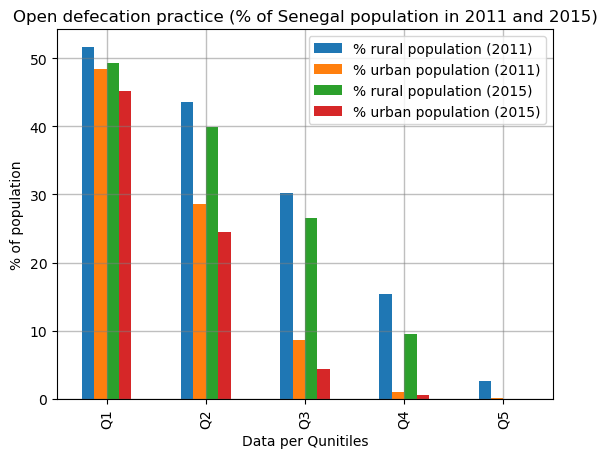

In [15]:
# Plot to compare two years 2011 and 2015 (open defecation practices)
merged_open_defecation_df.plot.bar(x="Quintile", y=["2011_y","2011_x","2015_y","2015_x"])
plt.legend(["% rural population (2011)","% urban population (2011)","% rural population (2015)","% urban population (2015)"])
plt.title("Open defecation practice (% of Senegal population in 2011 and 2015)")
plt.xlabel("Data per Qunitiles")
plt.ylabel("% of population")
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.show()
plt.close()

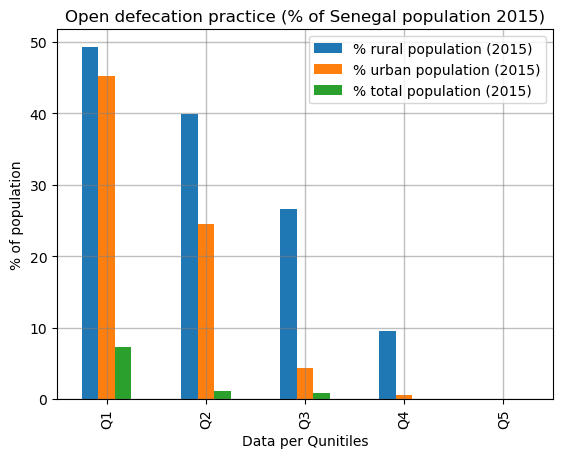

In [16]:
# Plot to compare two years 2015 (open defecation practices)
merged_open_defecation_df.plot.bar(x="Quintile", y=["2015_y","2015_x", "2015"])
plt.legend(["% rural population (2015)","% urban population (2015)","% total population (2015)"])
plt.title("Open defecation practice (% of Senegal population 2015)")
plt.xlabel("Data per Qunitiles")
plt.ylabel("% of population")
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.show()
plt.close()

In [17]:
# Data to collect for each Indicator Name and populate in the dataframe (access to drinking water)
basic_drinking_water_Q1 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People using at least basic drinking water services (% of  population): Q1 (lowest)",:]
basic_drinking_water_Q2 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People using at least basic drinking water services (% of  population): Q2",:]
basic_drinking_water_Q3 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People using at least basic drinking water services (% of  population): Q3",:]
basic_drinking_water_Q4 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People using at least basic drinking water services (% of  population): Q4",:]
basic_drinking_water_Q5 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People using at least basic drinking water services (% of  population): Q5 (highest)",:]

basic_drinking_water_df = [basic_drinking_water_Q1,basic_drinking_water_Q2,basic_drinking_water_Q3,basic_drinking_water_Q4,basic_drinking_water_Q5]

final_basic_drinking_water_df = pd.concat(basic_drinking_water_df)
final_basic_drinking_water_df['Quintile'] = list_of_quintile
final_basic_drinking_water_df




,Country Name,Country Code,Indicator Name,2011,2015,Quintile
70360,Senegal,SEN,People using at least basic drinking water services (% of population): Q1 (lowest),43.86977,46.60958,Q1
70361,Senegal,SEN,People using at least basic drinking water services (% of population): Q2,53.87267,58.69854,Q2
70362,Senegal,SEN,People using at least basic drinking water services (% of population): Q3,73.45343,78.99795,Q3
70363,Senegal,SEN,People using at least basic drinking water services (% of population): Q4,92.09299,93.63880,Q4
70364,Senegal,SEN,People using at least basic drinking water services (% of population): Q5 (highest),97.52921,98.05809,Q5


In [18]:
# Data to collect for each Indicator Name and populate in the dataframe for rural (access to drinking water)
basic_drinking_water_rural_Q1 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People using at least basic drinking water services, rural (% of rural population): Q1 (lowest)",:]
basic_drinking_water_rural_Q2 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People using at least basic drinking water services, rural (% of rural population): Q2",:]
basic_drinking_water_rural_Q3 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People using at least basic drinking water services, rural (% of rural population): Q3",:]
basic_drinking_water_rural_Q4 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People using at least basic drinking water services, rural (% of rural population): Q4",:]
basic_drinking_water_rural_Q5 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People using at least basic drinking water services, rural (% of rural population): Q5 (highest)",:]

basic_drinking_water_rural_df = [basic_drinking_water_rural_Q1,basic_drinking_water_rural_Q2,basic_drinking_water_rural_Q3,basic_drinking_water_rural_Q4,basic_drinking_water_rural_Q5]

final_basic_drinking_water_rural_df = pd.concat(basic_drinking_water_rural_df)
final_basic_drinking_water_rural_df['Quintile'] = list_of_quintile
final_basic_drinking_water_rural_df

,Country Name,Country Code,Indicator Name,2011,2015,Quintile
70365,Senegal,SEN,"People using at least basic drinking water services, rural (% of rural population): Q1 (lowest)",40.38710,42.20634,Q1
70366,Senegal,SEN,"People using at least basic drinking water services, rural (% of rural population): Q2",48.04268,52.02639,Q2
70367,Senegal,SEN,"People using at least basic drinking water services, rural (% of rural population): Q3",52.28563,57.83875,Q3
70368,Senegal,SEN,"People using at least basic drinking water services, rural (% of rural population): Q4",65.02180,71.25566,Q4
70369,Senegal,SEN,"People using at least basic drinking water services, rural (% of rural population): Q5 (highest)",83.54440,89.35415,Q5


In [19]:
# Data to collect for each Indicator Name and populate in the dataframe for urban (access to drinking water)
basic_drinking_water_urban_Q1 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People using at least basic drinking water services, urban (% of urban population): Q1 (lowest)",:]
basic_drinking_water_urban_Q2 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People using at least basic drinking water services, urban (% of urban population): Q2",:]
basic_drinking_water_urban_Q3 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People using at least basic drinking water services, urban (% of urban population): Q3",:]
basic_drinking_water_urban_Q4 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People using at least basic drinking water services, urban (% of urban population): Q4",:]
basic_drinking_water_urban_Q5 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People using at least basic drinking water services, urban (% of urban population): Q5 (highest)",:]

basic_drinking_water_urban_df = [basic_drinking_water_urban_Q1,basic_drinking_water_urban_Q2,basic_drinking_water_urban_Q3,basic_drinking_water_urban_Q4,basic_drinking_water_urban_Q5]

final_basic_drinking_water_urban_df = pd.concat(basic_drinking_water_urban_df)
final_basic_drinking_water_urban_df['Quintile'] = list_of_quintile
final_basic_drinking_water_urban_df

,Country Name,Country Code,Indicator Name,2011,2015,Quintile
70370,Senegal,SEN,"People using at least basic drinking water services, urban (% of urban population): Q1 (lowest)",72.73932,72.44643,Q1
70371,Senegal,SEN,"People using at least basic drinking water services, urban (% of urban population): Q2",92.60194,92.99218,Q2
70372,Senegal,SEN,"People using at least basic drinking water services, urban (% of urban population): Q3",95.12231,95.47924,Q3
70373,Senegal,SEN,"People using at least basic drinking water services, urban (% of urban population): Q4",97.77946,98.18866,Q4
70374,Senegal,SEN,"People using at least basic drinking water services, urban (% of urban population): Q5 (highest)",98.67086,99.02849,Q5


In [20]:
merged_basic_drinking_water_df = pd.merge(pd.merge(final_basic_drinking_water_df,final_basic_drinking_water_rural_df,on='Quintile'),final_basic_drinking_water_urban_df,on='Quintile')
merged_basic_drinking_water_df

,Country Name_x,Country Code_x,Indicator Name_x,2011_x,2015_x,Quintile,Country Name_y,Country Code_y,Indicator Name_y,2011_y,2015_y,Country Name,Country Code,Indicator Name,2011,2015
0,Senegal,SEN,People using at least basic drinking water services (% of population): Q1 (lowest),43.86977,46.60958,Q1,Senegal,SEN,"People using at least basic drinking water services, rural (% of rural population): Q1 (lowest)",40.38710,42.20634,Senegal,SEN,"People using at least basic drinking water services, urban (% of urban population): Q1 (lowest)",72.73932,72.44643
1,Senegal,SEN,People using at least basic drinking water services (% of population): Q2,53.87267,58.69854,Q2,Senegal,SEN,"People using at least basic drinking water services, rural (% of rural population): Q2",48.04268,52.02639,Senegal,SEN,"People using at least basic drinking water services, urban (% of urban population): Q2",92.60194,92.99218
2,Senegal,SEN,People using at least basic drinking water services (% of population): Q3,73.45343,78.99795,Q3,Senegal,SEN,"People using at least basic drinking water services, rural (% of rural population): Q3",52.28563,57.83875,Senegal,SEN,"People using at least basic drinking water services, urban (% of urban population): Q3",95.12231,95.47924
3,Senegal,SEN,People using at least basic drinking water services (% of population): Q4,92.09299,93.63880,Q4,Senegal,SEN,"People using at least basic drinking water services, rural (% of rural population): Q4",65.02180,71.25566,Senegal,SEN,"People using at least basic drinking water services, urban (% of urban population): Q4",97.77946,98.18866
4,Senegal,SEN,People using at least basic drinking water services (% of population): Q5 (highest),97.52921,98.05809,Q5,Senegal,SEN,"People using at least basic drinking water services, rural (% of rural population): Q5 (highest)",83.54440,89.35415,Senegal,SEN,"People using at least basic drinking water services, urban (% of urban population): Q5 (highest)",98.67086,99.02849


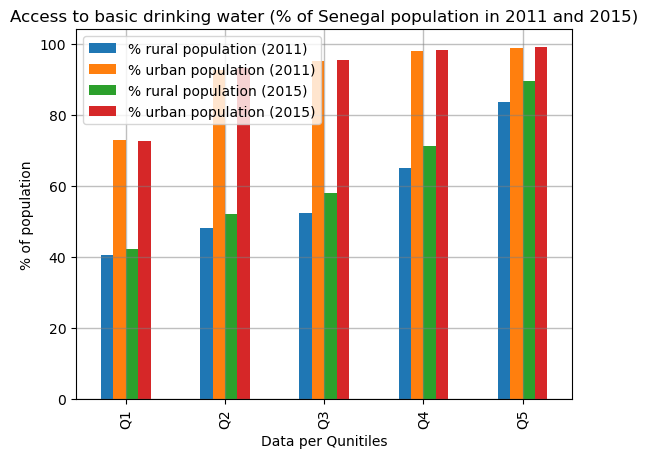

In [21]:
# Plot to compare two years 2011 and 2015 (basic drinking water)
merged_basic_drinking_water_df.plot.bar(x="Quintile", y=["2011_y","2011","2015_y","2015"])
plt.legend(["% rural population (2011)","% urban population (2011)","% rural population (2015)","% urban population (2015)"])
plt.title("Access to basic drinking water (% of Senegal population in 2011 and 2015)")
plt.xlabel("Data per Qunitiles")
plt.ylabel("% of population")
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.show()
plt.close()

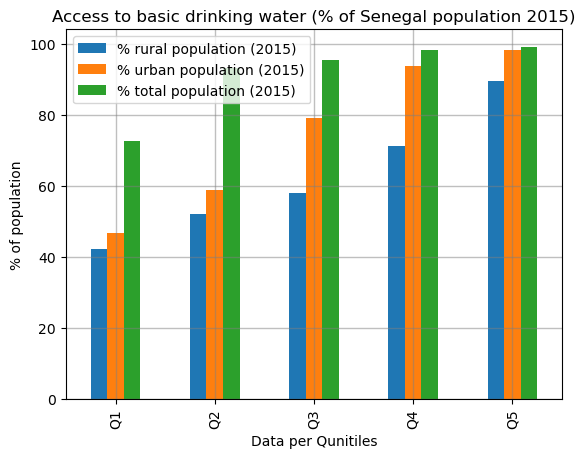

In [22]:
# Plot to compare 2015 (basic drinking water)
merged_basic_drinking_water_df.plot.bar(x="Quintile", y=["2015_y","2015_x", "2015"])
plt.legend(["% rural population (2015)","% urban population (2015)","% total population (2015)"])
plt.title("Access to basic drinking water (% of Senegal population 2015)")
plt.xlabel("Data per Qunitiles")
plt.ylabel("% of population")
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.show()
plt.close()

In [23]:
# Data to collect for each Indicator Name and populate in the dataframe (access to basic sanitation services)
basic_sanitation_Q1 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People using at least basic sanitation services (% of  population): Q1 (lowest)",:]
basic_sanitation_Q2 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People using at least basic sanitation services (% of  population): Q2",:]
basic_sanitation_Q3 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People using at least basic sanitation services (% of  population): Q3",:]
basic_sanitation_Q4 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People using at least basic sanitation services (% of  population): Q4",:]
basic_sanitation_Q5 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People using at least basic sanitation services (% of  population): Q5 (highest)",:]

basic_sanitation_df = [basic_sanitation_Q1,basic_sanitation_Q2,basic_sanitation_Q3,basic_sanitation_Q4,basic_sanitation_Q5]

final_basic_sanitation_df = pd.concat(basic_sanitation_df)
final_basic_sanitation_df['Quintile'] = list_of_quintile
final_basic_sanitation_df



,Country Name,Country Code,Indicator Name,2011,2015,Quintile
70375,Senegal,SEN,People using at least basic sanitation services (% of population): Q1 (lowest),11.82889,10.81114,Q1
70376,Senegal,SEN,People using at least basic sanitation services (% of population): Q2,27.90670,30.07859,Q2
70377,Senegal,SEN,People using at least basic sanitation services (% of population): Q3,53.55843,59.16003,Q3
70378,Senegal,SEN,People using at least basic sanitation services (% of population): Q4,63.21721,66.13861,Q4
70379,Senegal,SEN,People using at least basic sanitation services (% of population): Q5 (highest),81.74692,83.45652,Q5


In [24]:
# Data to collect for each Indicator Name and populate in the dataframe for rural (access to basic sanitation services)
basic_sanitation_rural_Q1 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People using at least basic sanitation services, rural (% of rural population): Q1 (lowest)",:]
basic_sanitation_rural_Q2 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People using at least basic sanitation services, rural (% of rural population): Q2",:]
basic_sanitation_rural_Q3 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People using at least basic sanitation services, rural (% of rural population): Q3",:]
basic_sanitation_rural_Q4 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People using at least basic sanitation services, rural (% of rural population): Q4",:]
basic_sanitation_rural_Q5 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People using at least basic sanitation services, rural (% of rural population): Q5 (highest)",:]

basic_sanitation_rural_df = [basic_sanitation_rural_Q1,basic_sanitation_rural_Q2,basic_sanitation_rural_Q3,basic_sanitation_rural_Q4,basic_sanitation_rural_Q5]

final_basic_sanitation_rural_df = pd.concat(basic_sanitation_rural_df)
final_basic_sanitation_rural_df['Quintile'] = list_of_quintile
final_basic_sanitation_rural_df

,Country Name,Country Code,Indicator Name,2011,2015,Quintile
70380,Senegal,SEN,"People using at least basic sanitation services, rural (% of rural population): Q1 (lowest)",8.92191,7.03861,Q1
70381,Senegal,SEN,"People using at least basic sanitation services, rural (% of rural population): Q2",16.45270,16.67629,Q2
70382,Senegal,SEN,"People using at least basic sanitation services, rural (% of rural population): Q3",26.67186,28.56468,Q3
70383,Senegal,SEN,"People using at least basic sanitation services, rural (% of rural population): Q4",47.85738,53.83990,Q4
70384,Senegal,SEN,"People using at least basic sanitation services, rural (% of rural population): Q5 (highest)",74.77838,81.91372,Q5


In [25]:
# Data to collect for each Indicator Name and populate in the dataframe for urban (access to basic sanitation services)
basic_sanitation_urban_Q1 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People using at least basic sanitation services, urban (% of urban population): Q1 (lowest)",:]
basic_sanitation_urban_Q2 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People using at least basic sanitation services, urban (% of urban population): Q2",:]
basic_sanitation_urban_Q3 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People using at least basic sanitation services, urban (% of urban population): Q3",:]
basic_sanitation_urban_Q4 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People using at least basic sanitation services, urban (% of urban population): Q4",:]
basic_sanitation_urban_Q5 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People using at least basic sanitation services, urban (% of urban population): Q5 (highest)",:]

basic_sanitation_urban_df = [basic_sanitation_urban_Q1,basic_sanitation_urban_Q2,basic_sanitation_urban_Q3,basic_sanitation_urban_Q4,basic_sanitation_urban_Q5]

final_basic_sanitation_urban_df = pd.concat(basic_sanitation_urban_df)
final_basic_sanitation_urban_df['Quintile'] = list_of_quintile
final_basic_sanitation_urban_df


,Country Name,Country Code,Indicator Name,2011,2015,Quintile
70385,Senegal,SEN,"People using at least basic sanitation services, urban (% of urban population): Q1 (lowest)",44.33269,45.54634,Q1
70386,Senegal,SEN,"People using at least basic sanitation services, urban (% of urban population): Q2",55.98944,57.94116,Q2
70387,Senegal,SEN,"People using at least basic sanitation services, urban (% of urban population): Q3",60.61757,62.25476,Q3
70388,Senegal,SEN,"People using at least basic sanitation services, urban (% of urban population): Q4",73.53963,74.99107,Q4
70389,Senegal,SEN,"People using at least basic sanitation services, urban (% of urban population): Q5 (highest)",88.75925,89.40285,Q5


In [26]:
merged_basic_sanitation_df = pd.merge(pd.merge(final_basic_sanitation_df,final_basic_sanitation_rural_df,on='Quintile'),final_basic_sanitation_urban_df,on='Quintile')
merged_basic_sanitation_df

,Country Name_x,Country Code_x,Indicator Name_x,2011_x,2015_x,Quintile,Country Name_y,Country Code_y,Indicator Name_y,2011_y,2015_y,Country Name,Country Code,Indicator Name,2011,2015
0,Senegal,SEN,People using at least basic sanitation services (% of population): Q1 (lowest),11.82889,10.81114,Q1,Senegal,SEN,"People using at least basic sanitation services, rural (% of rural population): Q1 (lowest)",8.92191,7.03861,Senegal,SEN,"People using at least basic sanitation services, urban (% of urban population): Q1 (lowest)",44.33269,45.54634
1,Senegal,SEN,People using at least basic sanitation services (% of population): Q2,27.90670,30.07859,Q2,Senegal,SEN,"People using at least basic sanitation services, rural (% of rural population): Q2",16.45270,16.67629,Senegal,SEN,"People using at least basic sanitation services, urban (% of urban population): Q2",55.98944,57.94116
2,Senegal,SEN,People using at least basic sanitation services (% of population): Q3,53.55843,59.16003,Q3,Senegal,SEN,"People using at least basic sanitation services, rural (% of rural population): Q3",26.67186,28.56468,Senegal,SEN,"People using at least basic sanitation services, urban (% of urban population): Q3",60.61757,62.25476
3,Senegal,SEN,People using at least basic sanitation services (% of population): Q4,63.21721,66.13861,Q4,Senegal,SEN,"People using at least basic sanitation services, rural (% of rural population): Q4",47.85738,53.83990,Senegal,SEN,"People using at least basic sanitation services, urban (% of urban population): Q4",73.53963,74.99107
4,Senegal,SEN,People using at least basic sanitation services (% of population): Q5 (highest),81.74692,83.45652,Q5,Senegal,SEN,"People using at least basic sanitation services, rural (% of rural population): Q5 (highest)",74.77838,81.91372,Senegal,SEN,"People using at least basic sanitation services, urban (% of urban population): Q5 (highest)",88.75925,89.40285


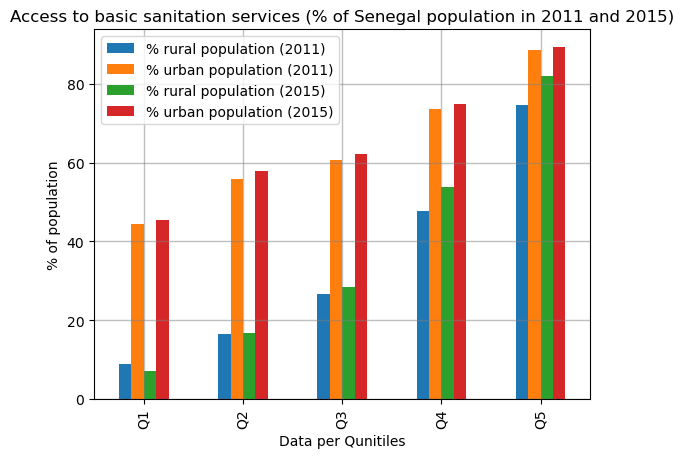

In [27]:
# Plot to compare two years 2011 and 2015 (basic sanitation services)
merged_basic_sanitation_df.plot.bar(x="Quintile", y=["2011_y","2011","2015_y","2015"])
plt.legend(["% rural population (2011)","% urban population (2011)","% rural population (2015)","% urban population (2015)"])
plt.title("Access to basic sanitation services (% of Senegal population in 2011 and 2015)")
plt.xlabel("Data per Qunitiles")
plt.ylabel("% of population")
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.show()
plt.close()

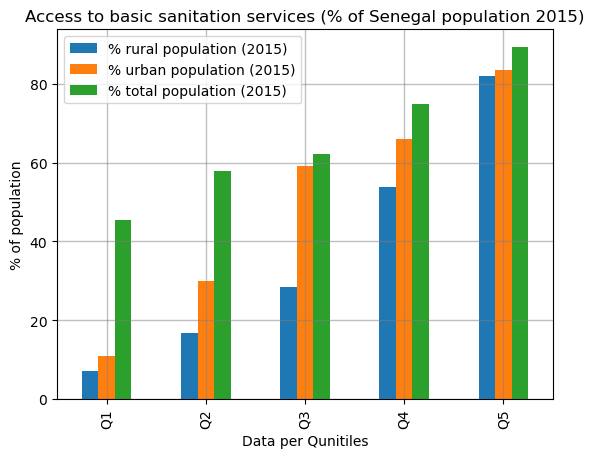

In [28]:
# Plot to compare  2015 (basic sanitation services)
merged_basic_sanitation_df.plot.bar(x="Quintile", y=["2015_y","2015_x", "2015"])
plt.legend(["% rural population (2015)","% urban population (2015)","% total population (2015)"])
plt.title("Access to basic sanitation services (% of Senegal population 2015)")
plt.xlabel("Data per Qunitiles")
plt.ylabel("% of population")
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.show()
plt.close()

In [29]:
# Define the other data indicators

indicators_ARI_prevalance = ['Prevalence of acute respiratory infection (ARI) (% of children under 5): Q1 (lowest)',
              'Prevalence of acute respiratory infection (ARI) (% of children under 5): Q2',
              'Prevalence of acute respiratory infection (ARI) (% of children under 5): Q3',
              'Prevalence of acute respiratory infection (ARI) (% of children under 5): Q4',
              'Prevalence of acute respiratory infection (ARI) (% of children under 5): Q5 (highest)']

indicators_diarrhea_prevalance  =['Prevalence of diarrhea (% of children under 5): Q1 (lowest)',
              'Prevalence of diarrhea (% of children under 5): Q2',
              'Prevalence of diarrhea (% of children under 5): Q3',
              'Prevalence of diarrhea (% of children under 5): Q4',
              'Prevalence of diarrhea (% of children under 5): Q5 (highest)']

indicators_ARI_treatment = ['Treatment of acute respiratory infection (ARI) (% of children under 5 taken to a health provider): Q1 (lowest)',
              'Treatment of acute respiratory infection (ARI) (% of children under 5 taken to a health provider): Q2',
              'Treatment of acute respiratory infection (ARI) (% of children under 5 taken to a health provider): Q3',
              'Treatment of acute respiratory infection (ARI) (% of children under 5 taken to a health provider): Q4',
              'Treatment of acute respiratory infection (ARI) (% of children under 5 taken to a health provider): Q5 (highest)']

indicators_diarrhea_treatment = ['Treatment of diarrhea (ORS, RHS or increased fluids) (% of children under 5): Q1 (lowest)',
              'Treatment of diarrhea (ORS, RHS or increased fluids) (% of children under 5): Q2',
              'Treatment of diarrhea (ORS, RHS or increased fluids) (% of children under 5): Q3',
              'Treatment of diarrhea (ORS, RHS or increased fluids) (% of children under 5): Q4',
              'Treatment of diarrhea (ORS, RHS or increased fluids) (% of children under 5): Q5 (highest)']

mortality_indicator = ['Under-5 mortality rate (per 1,000 live births): Q1 (lowest)',
              'Under-5 mortality rate (per 1,000 live births): Q2',
              'Under-5 mortality rate (per 1,000 live births): Q3',
              'Under-5 mortality rate (per 1,000 live births): Q4',
              'Under-5 mortality rate (per 1,000 live births): Q5 (highest)']

In [30]:
ARI_prevalance_indicator_df = country_senegal_df[country_senegal_df["Indicator Name"].isin(indicators_ARI_prevalance)]

ARI_prevalance_indicator_df = ARI_prevalance_indicator_df.reset_index(drop=True)


ARI_prevalance_indicator_df['Quintiles'] = list_of_quintile


ARI_prevalance_indicator_df= ARI_prevalance_indicator_df.set_index("Quintiles").drop(['Country Name', 'Country Code'], axis=1)

ARI_prevalance_indicator_df

,Indicator Name,2011,2015
Quintiles,,,
Q1,Prevalence of acute respiratory infection (ARI) (% of children under 5): Q1 (lowest),4.7,4.7
Q2,Prevalence of acute respiratory infection (ARI) (% of children under 5): Q2,3.1,3.5
Q3,Prevalence of acute respiratory infection (ARI) (% of children under 5): Q3,4.9,2.6
Q4,Prevalence of acute respiratory infection (ARI) (% of children under 5): Q4,7.3,3.9
Q5,Prevalence of acute respiratory infection (ARI) (% of children under 5): Q5 (highest),7.8,2.2


In [31]:
ARI_treatment_indicator_df = country_senegal_df[country_senegal_df["Indicator Name"].isin(indicators_ARI_treatment)]

ARI_treatment_indicator_df = ARI_treatment_indicator_df.reset_index(drop=True)
ARI_treatment_indicator_df = ARI_treatment_indicator_df.drop(['Country Name','Country Code'], axis=1)

#No record find for this indicator so using and assumpution to plot a chart
hardcoded_record_dict = {'Indicator Name': 'Treatment of acute respiratory infection (ARI) (% of children under 5 taken to a health provider): Q5 (highest)',
                                  '2011': 0.0,
                                  '2015': 0.0
                                  }
hardcoded_record_df = pd.DataFrame(hardcoded_record_dict, index=[4])

ARI_treatment_indicator_df = pd.concat([ARI_treatment_indicator_df,hardcoded_record_df])
                            
ARI_treatment_indicator_df['Quintiles'] = list_of_quintile


ARI_treatment_indicator_df= ARI_treatment_indicator_df.set_index("Quintiles")

ARI_treatment_indicator_df

,Indicator Name,2011,2015
Quintiles,,,
Q1,Treatment of acute respiratory infection (ARI) (% of children under 5 taken to a health provider): Q1 (lowest),38.6,49.0
Q2,Treatment of acute respiratory infection (ARI) (% of children under 5 taken to a health provider): Q2,52.5,64.4
Q3,Treatment of acute respiratory infection (ARI) (% of children under 5 taken to a health provider): Q3,61.1,49.4
Q4,Treatment of acute respiratory infection (ARI) (% of children under 5 taken to a health provider): Q4,55.2,52.5
Q5,Treatment of acute respiratory infection (ARI) (% of children under 5 taken to a health provider): Q5 (highest),0.0,0.0


In [32]:
diarrhea_prevalance_indicator_df = country_senegal_df[country_senegal_df["Indicator Name"].isin(indicators_diarrhea_prevalance)]

diarrhea_prevalance_indicator_df = diarrhea_prevalance_indicator_df.reset_index(drop=True)

diarrhea_prevalance_indicator_df['Quintiles'] = list_of_quintile


diarrhea_prevalance_indicator_df= diarrhea_prevalance_indicator_df.set_index("Quintiles").drop(['Country Name', 'Country Code'], axis=1)

diarrhea_prevalance_indicator_df

,Indicator Name,2011,2015
Quintiles,,,
Q1,Prevalence of diarrhea (% of children under 5): Q1 (lowest),25.5,30.7
Q2,Prevalence of diarrhea (% of children under 5): Q2,23.6,24.1
Q3,Prevalence of diarrhea (% of children under 5): Q3,24.6,20.9
Q4,Prevalence of diarrhea (% of children under 5): Q4,31.9,23.0
Q5,Prevalence of diarrhea (% of children under 5): Q5 (highest),24.6,14.3


In [33]:
diarrhea_treatment_indicator_df = country_senegal_df[country_senegal_df["Indicator Name"].isin(indicators_diarrhea_treatment)]

diarrhea_treatment_indicator_df = diarrhea_treatment_indicator_df.reset_index(drop=True)

diarrhea_treatment_indicator_df['Quintiles'] = list_of_quintile


diarrhea_treatment_indicator_df= diarrhea_treatment_indicator_df.set_index("Quintiles").drop(['Country Name','Country Code'], axis=1)

diarrhea_treatment_indicator_df

,Indicator Name,2011,2015
Quintiles,,,
Q1,"Treatment of diarrhea (ORS, RHS or increased fluids) (% of children under 5): Q1 (lowest)",47.9,27.2
Q2,"Treatment of diarrhea (ORS, RHS or increased fluids) (% of children under 5): Q2",54.6,22.3
Q3,"Treatment of diarrhea (ORS, RHS or increased fluids) (% of children under 5): Q3",45.7,28.0
Q4,"Treatment of diarrhea (ORS, RHS or increased fluids) (% of children under 5): Q4",43.4,22.0
Q5,"Treatment of diarrhea (ORS, RHS or increased fluids) (% of children under 5): Q5 (highest)",39.1,39.2


In [34]:
under_five_mortality_indicator_df = country_senegal_df[country_senegal_df["Indicator Name"].isin(mortality_indicator)]

under_five_mortality_indicator_df = under_five_mortality_indicator_df.reset_index(drop=True)

under_five_mortality_indicator_df['Quintiles'] = list_of_quintile


under_five_mortality_indicator_df= under_five_mortality_indicator_df.set_index("Quintiles").drop(['Country Name', 'Country Code'], axis=1)

under_five_mortality_indicator_df

,Indicator Name,2011,2015
Quintiles,,,
Q1,"Under-5 mortality rate (per 1,000 live births): Q1 (lowest)",119.0,87.0
Q2,"Under-5 mortality rate (per 1,000 live births): Q2",94.0,77.0
Q3,"Under-5 mortality rate (per 1,000 live births): Q3",81.0,65.0
Q4,"Under-5 mortality rate (per 1,000 live births): Q4",69.0,53.0
Q5,"Under-5 mortality rate (per 1,000 live births): Q5 (highest)",54.0,37.0


In [35]:
ARI_merged_df = pd.merge(ARI_prevalance_indicator_df, ARI_treatment_indicator_df, on = ["Quintiles"])

ARI_merged_df



,Indicator Name_x,2011_x,2015_x,Indicator Name_y,2011_y,2015_y
Quintiles,,,,,,
Q1,Prevalence of acute respiratory infection (ARI) (% of children under 5): Q1 (lowest),4.7,4.7,Treatment of acute respiratory infection (ARI) (% of children under 5 taken to a health provider): Q1 (lowest),38.6,49.0
Q2,Prevalence of acute respiratory infection (ARI) (% of children under 5): Q2,3.1,3.5,Treatment of acute respiratory infection (ARI) (% of children under 5 taken to a health provider): Q2,52.5,64.4
Q3,Prevalence of acute respiratory infection (ARI) (% of children under 5): Q3,4.9,2.6,Treatment of acute respiratory infection (ARI) (% of children under 5 taken to a health provider): Q3,61.1,49.4
Q4,Prevalence of acute respiratory infection (ARI) (% of children under 5): Q4,7.3,3.9,Treatment of acute respiratory infection (ARI) (% of children under 5 taken to a health provider): Q4,55.2,52.5
Q5,Prevalence of acute respiratory infection (ARI) (% of children under 5): Q5 (highest),7.8,2.2,Treatment of acute respiratory infection (ARI) (% of children under 5 taken to a health provider): Q5 (highest),0.0,0.0


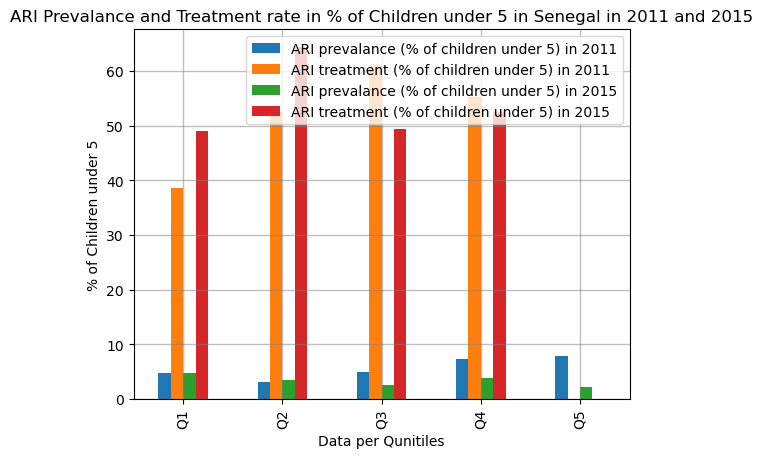

In [36]:
# ARI Prevalance and Treatment rate in % of Children under 5 in Senegal in 2011 and 2015
ARI_merged_df.plot.bar(y=["2011_x","2011_y", "2015_x","2015_y"])
plt.legend(["ARI prevalance (% of children under 5) in 2011","ARI treatment (% of children under 5) in 2011","ARI prevalance (% of children under 5) in 2015","ARI treatment (% of children under 5) in 2015"])
plt.title("ARI Prevalance and Treatment rate in % of Children under 5 in Senegal in 2011 and 2015")
plt.xlabel("Data per Qunitiles")
plt.ylabel("% of Children under 5")
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.show()
plt.close()



In [37]:
# Diarrhea Prevalance and Treatment rate in % of Children under 5 in Senegal 2011 and 2015
diarrhea_merged_df = pd.merge(diarrhea_prevalance_indicator_df, diarrhea_treatment_indicator_df, on = ["Quintiles"])

diarrhea_merged_df



,Indicator Name_x,2011_x,2015_x,Indicator Name_y,2011_y,2015_y
Quintiles,,,,,,
Q1,Prevalence of diarrhea (% of children under 5): Q1 (lowest),25.5,30.7,"Treatment of diarrhea (ORS, RHS or increased fluids) (% of children under 5): Q1 (lowest)",47.9,27.2
Q2,Prevalence of diarrhea (% of children under 5): Q2,23.6,24.1,"Treatment of diarrhea (ORS, RHS or increased fluids) (% of children under 5): Q2",54.6,22.3
Q3,Prevalence of diarrhea (% of children under 5): Q3,24.6,20.9,"Treatment of diarrhea (ORS, RHS or increased fluids) (% of children under 5): Q3",45.7,28.0
Q4,Prevalence of diarrhea (% of children under 5): Q4,31.9,23.0,"Treatment of diarrhea (ORS, RHS or increased fluids) (% of children under 5): Q4",43.4,22.0
Q5,Prevalence of diarrhea (% of children under 5): Q5 (highest),24.6,14.3,"Treatment of diarrhea (ORS, RHS or increased fluids) (% of children under 5): Q5 (highest)",39.1,39.2


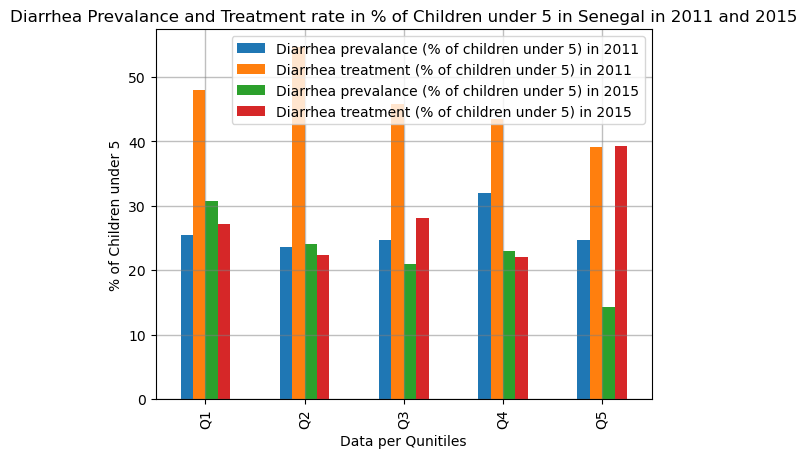

In [40]:
# Diarrhea Prevalance and Treatment rate in % of Children under 5 in Senegal 2011 and 2015
diarrhea_merged_df.plot.bar(y=["2011_x","2011_y", "2015_x","2015_y"])
plt.legend(["Diarrhea prevalance (% of children under 5) in 2011","Diarrhea treatment (% of children under 5) in 2011","Diarrhea prevalance (% of children under 5) in 2015","Diarrhea treatment (% of children under 5) in 2015"])
plt.title("Diarrhea Prevalance and Treatment rate in % of Children under 5 in Senegal in 2011 and 2015")
plt.xlabel("Data per Qunitiles")
plt.ylabel("% of Children under 5")
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.show()
plt.close()

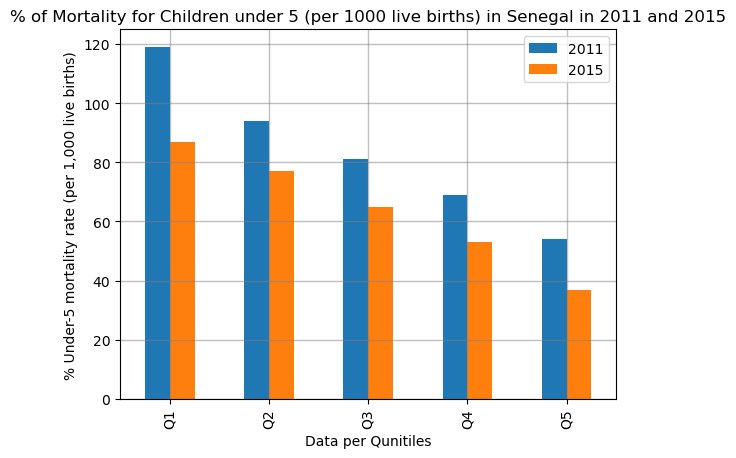

In [41]:
# % of Mortality for Children under 5 (per 1000 live births) in Senegal 2011 and 2015
under_five_mortality_indicator_df.plot.bar(y=["2011","2015"])
plt.legend(["2011","2015"])
plt.title("% of Mortality for Children under 5 (per 1000 live births) in Senegal in 2011 and 2015")
plt.xlabel("Data per Qunitiles")
plt.ylabel("% Under-5 mortality rate (per 1,000 live births)")
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.show()
plt.close()